<a href="https://colab.research.google.com/github/junyong1111/KMU-2022/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install jellyfish
!pip install --upgrade imutils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/Capstone/OCR/kor.traineddata /usr/share/tesseract-ocr/4.00/tessdata
#### 구글 드라이브에 한글데이터 파일을 코랩 tesseract-ocr 언어 경로로 복사

In [ ]:
#### 필요 라이브러리 import
from skimage.filters import threshold_local
import matplotlib.pyplot as plt
import cv2
import os
import pytesseract
from pytesseract import Output
from PIL import Image
import re
import numpy as np
import jellyfish
import imutils

In [ ]:
def order_points(pts):
    rect = np.zeros((4, 2), dtype="float32")

    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect
    
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped

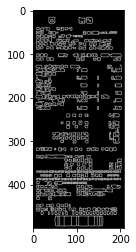

In [ ]:
image_name = "/content/5.jpg"
min_conf = 0

image = cv2.imread(image_name)
ratio = image.shape[0] / 500.0 ### 이미치 처리 속도를 높이고 가장자리 탐지를 위해
original = image.copy() 
image = imutils.resize(image, height= 500)
GRAY = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
height, width = GRAY.shape
GRAY = cv2.GaussianBlur(GRAY, (5, 5), 0)
edged = cv2.Canny(GRAY, 75, 200)

plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

########################## STEP1 #######################

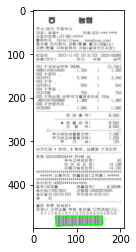

In [ ]:
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

for c in cnts:
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * peri, True)

  if len(approx) == 4:
      screenCnt = approx
      break

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

########################## STEP2 #######################

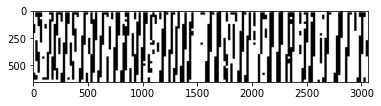

In [ ]:
warped = four_point_transform(original, screenCnt.reshape(4, 2) * ratio)
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
warped = imutils.resize(warped, height = 650)
plt.imshow(cv2.cvtColor( warped,cv2.COLOR_BGR2RGB))
plt.show()

########################## STEP3 #######################

In [ ]:
height, width = warped.shape
enlarge = cv2.resize(warped, (2*width, 2*height), interpolation=cv2.INTER_LINEAR)
denoised = cv2.fastNlMeansDenoising(enlarge, h=10, searchWindowSize=21, templateWindowSize=7)
plt.imshow(cv2.cvtColor(denoised,cv2.COLOR_BGR2RGB))
plt.show()
results = pytesseract.image_to_string(denoised ,lang='kor')
print(results)

KeyboardInterrupt: ignored

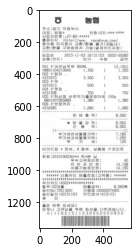

 
  
    
 
 

뺄
브
２ ㄳ １０
니
붐
른

전 화 :０３１-#$ ㅊ -$88$
: １２7 -8２-$8 ㅊ ㅊㅊ

와 ){ 힌 ２://ｍ 뻬 ‥ ０００987３１００．００ｍ/
미 지 참 시 교 환 / 환 블 l〕)【30윌니)

20|5-l】-0그 １6１３１:５３_ ０００２-０００8５

 

상 품 （ 코 드 ) 단가 수 량 금 액
００１ 『 굿 모 님 우 유 9００4． [２．１５０)
‡88０１１０4２１０64５ １．３５０ １ １．３５０
００２ 『 양 파 ,
‡２３１97３ ３．３００ １ ３,３００
００３ 『 무 ．
２３１9１３ ５００ ㅣ ５００
００4 『 깻 잎 ．
２３１３０8 7５０ １
００５ 『 하 선 정 비쥴!믹기!몬침이찌 １５０３
88０１００7２6５889 １．３8０
００6 『 브 로 커 리 ．
３２３２２8５ １．２8０ １ １．２8０
판 매 총 액 : 8．５6０
$ 밭 을 금 액 8．５6０
신 용 액 8．５6０
꾸 기 늬 지 끼 이 의 의 미 띠 ２~ 기 씨 기 끼 니 느 끼 （（
부 가 세 면 세 물 품 가 액 7．１8０
부 가 세 과 세 물 품 가 액 : １,２５５
부 가 세 １２５

회 원 :２０１０１9００３4*$‡ 박 ‡ 분 님

 

우 수 고 객 포 인 트 : 4０
잔 여 포 인 １4．１98
사 용 가 능 포 인 트 : １4．１9０

$３7+7 ㅊ 77３３77+３7‡7３‡‡+３77３777３7+ ㅊ 777
**** ㅎ * 신 용 카 드 매 출 전 묘 （ 고 객 욤 ) ‡+ ㅊ ㅊ ㅊ ㅊ ㅊ
우 $$77778+ ㅊ 7+*$ ㅇ 7*３9‡7++$ ㅊ ３‡ ㅊ ㅇ 7+$３ 우
우 리 카 드 : 【 슨 ００4１１１１１１１３３３１１
: 매 출 글 액 : 8．５6０ 원
가 앵 점 :００００００749０
카 드 밴사 ３《１５（￥３)

 



In [ ]:
image_name = "/content/5.jpg"
min_conf = 0

image = cv2.imread(image_name)
GRAY = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
height, width = GRAY.shape
cv2.GaussianBlur(GRAY, (5, 5), 0)


####################### Gaussian  ######################
#GRAY = cv2.adaptiveThreshold(GRAY_enlarge,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#cv2.THRESH_BINARY,15,2)
####################### Gaussian  ######################

####################### Enlarge 2x
GRAY_enlarge = cv2.resize(GRAY, (2*width, 2*height), interpolation=cv2.INTER_LINEAR)
####################### Enlarge 2x

###################### Denoising ######################
denoised = cv2.fastNlMeansDenoising(GRAY_enlarge, h=10, searchWindowSize=21, templateWindowSize=7)
###################### Denoising ######################
plt.imshow(cv2.cvtColor(denoised,cv2.COLOR_BGR2RGB))
plt.show()

results = pytesseract.image_to_string(denoised ,lang='kor') ### /usr/share/tesseract-ocr/4.00/tessdata/kor.traineddata 원하는 데이터를 넣어줘야 함
# results = re.compile('[|가-힣|+').sub('', results)
print(results)


In [ ]:
classes = ["가지","감자", "깻잎", "버터", "당근",
           "대파","마늘", "무","배추","브로콜리",
           "상추","새송이버섯","시금치","애호박",
           "양배추", "양송이버섯","양파","오이",
           "고추","고구마", "콩나물", "귤","감",
           "딸기", "멜론", "참외", "배", "복숭아",
           "블루베리", "사과", "수박", "파프리카",
           "키위","방울토마토", "소고기","돼지고기",
           "닭고기", "달걀", "조기", "갈치","고등어",
           "문어", "꽃게", "새우", "오징어","바지락",
           "멸치", "두부", "옥수수","밥"]

           
min_confidence = 0.6
string = results

list = []
for i in string :
    if i.isalpha() :
        list.append(i)
    elif i == "\n" :
        list.append("\n")
string = "".join(list)

Korean = re.compile('[^ ㄱ-ㅣ가-힣+]')
result = Korean.sub(' ',string)
result = result.replace("\n", " ")
result = result.split(" ")
recipe = []
for i in result :
  if i != '' :
    recipe.append(i)
print(recipe)


for i in recipe:
  for j in classes:
    if j in i:
      print("인식된 재료는 : ", j)


# for i in recipe:
#   for j in classes:
#     confidence = jellyfish.jaro_distance(i, j)
#     if(confidence > min_confidence ):
#         print(j) 








['뺄', '브', 'ㄳ', '니', '붐', '른', '전화ㅊ', 'ㅊㅊㅊ', '와힌', '뻬', '미지참시교환환블', '윌니', '그', '상품코드단가수량금액', '굿모님우유', '양파', '무', 'ㅣ', '깻잎', '하선정비쥴믹기몬침이찌', '브로커리', '판매총액', '밭을금액', '신용액', '꾸기늬지끼이의의미띠기씨기끼니느끼', '부가세면세물품가액', '부가세과세물품가액', '부가세', '회원박분님', '우수고객포인트', '잔여포인', '사용가능포인트', 'ㅊㅊ', 'ㅎ신용카드매출전묘고객욤ㅊㅊㅊㅊㅊ', '우ㅊㅇㅊㅊㅇ우', '우리카드슨', '매출글액원', '가앵점', '카드밴사']
인식된 재료는 :  양파
인식된 재료는 :  무
인식된 재료는 :  깻잎
